<a href="https://colab.research.google.com/github/nguyenluuvy/final_project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from google.colab import drive
drive.mount('/content/drive')

train_data_dir = '/content/drive/MyDrive/emotions_new/train'
test_data_dir = '/content/drive/MyDrive/emotions_new/test'

img_width, img_height = 48, 48
input_shape = (img_width, img_height, 3)

num_classes = 7

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size=(img_width, img_height),
batch_size=32,
class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size=(img_width, img_height),
batch_size=32,
class_mode='categorical')

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

history = model.fit(
train_generator,
steps_per_epoch=train_generator.samples // train_generator.batch_size,
epochs=10,
validation_data=test_generator,
validation_steps=test_generator.samples // test_generator.batch_size)

model.save('/content/drive/MyDrive/emotion_recognition_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 28754 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/10
898/898 [==============================] - 603s 668ms/step - loss: 1.7124 - accuracy: 0.3008 - val_loss: 1.5905 - val_accuracy: 0.3617
Epoch 2/10
898/898 [==============================] - 353s 393ms/step - loss: 1.4022 - accuracy: 0.4543 - val_loss: 1.3254 - val_accuracy: 0.4912
Epoch 3/10
898/898 [==============================] - 298s 332ms/step - loss: 1.2544 - accuracy: 0.5228 - val_loss: 1.2413 - val_accuracy: 0.5198
Epoch 4/10
898/898 [==============================] - 283s 315ms/step - loss: 1.1597 - accuracy: 0.5574 - val_loss: 1.2869 - val_accuracy: 0.5158
Epoch 5/10
898/898 [==============================] - 273s 303ms/step - loss: 1.0857 - accuracy: 0.5876 - val_loss: 1.2278 - val_accuracy: 0.5317
Epoch 6/10
898/898 [==============================] - 26

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 88ms/step


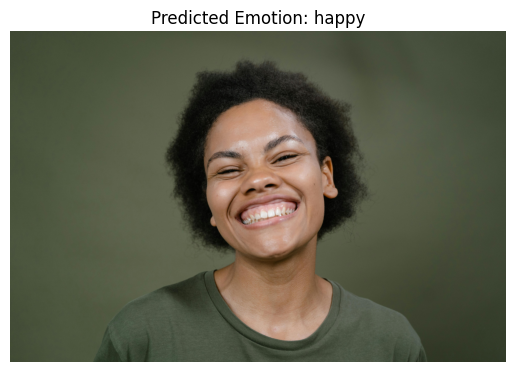

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('/content/drive/MyDrive/emotion_recognition_model.h5')

emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

def predict_emotion(image_path):
    img = image.load_img(image_path, target_size=(48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    predicted_label = emotion_labels[np.argmax(predictions)]

    return predicted_label, predictions[0]

def display_image_with_emotion(image_path, emotion_label, predictions):
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')

    plt.title(f'Predicted Emotion: {emotion_label}')
    plt.xlabel(f'Predictions: {predictions}')
    plt.show()

uploaded_image_path = 'cuoi_vui.jpg'
predicted_emotion, predictions = predict_emotion(uploaded_image_path)
display_image_with_emotion(uploaded_image_path, predicted_emotion, predictions)
